## Perceptron update - 2D, arbitrary number of classes

An upgrade of my first neural network, a single-layer arbitrary classes perceptron classifier with simple two-dimensional custom data just to evaluate the algorithm.

In [1]:
import numpy as np
from p2d import Perceptron2d as Perceptron
import matplotlib.pyplot as plt 

A simple set of two-dimensional labeled training data is used in this example. We have three classes: 0, 1 and 2.

In [3]:
# train data
M = 6
data = np.zeros((M,3))  # x, y, label
# last element is the label
data[0] = [0.9, 0.1, 0]
data[1] = [1.9, 0.8, 2]
data[2] = [2, 0.9, 2]
data[3] = [1 ,0.2, 0]
data[4] = [1.2, 0.1, 1]
data[5] = [1.6, 0.6, 1]

Now, we define our Perceptron and train it with the above defined data. We have to find two lines that separates the points that belong to the three different classes. If this cannot be done, lines that minimizes the errors on training data classification will be found when the algorithm hit the maximum number of iterations (since it will not converge).

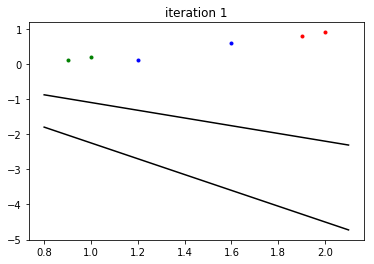

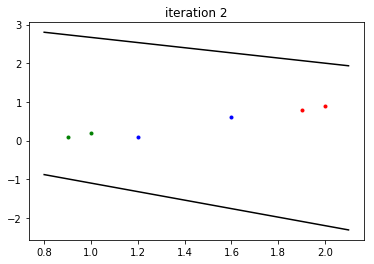

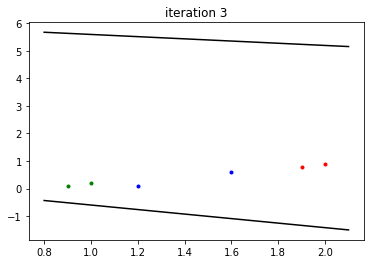

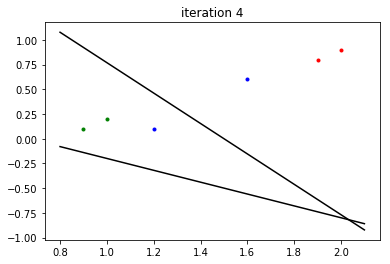

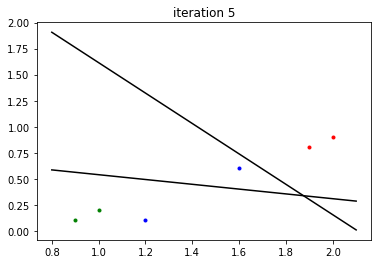

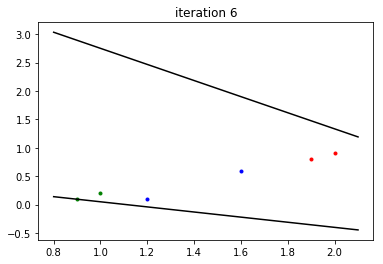

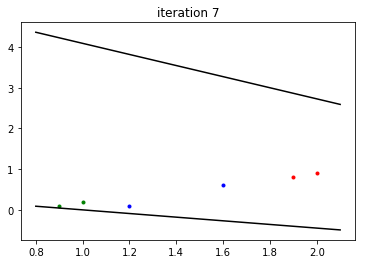

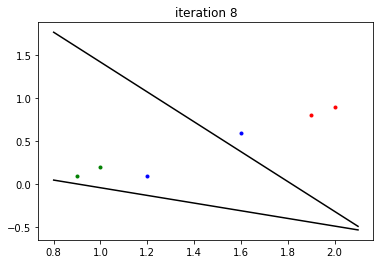

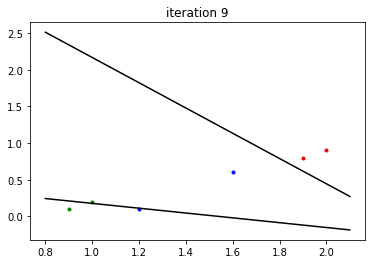

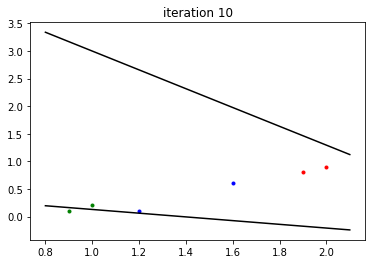

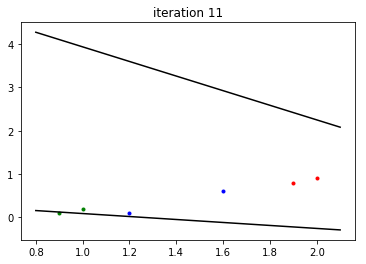

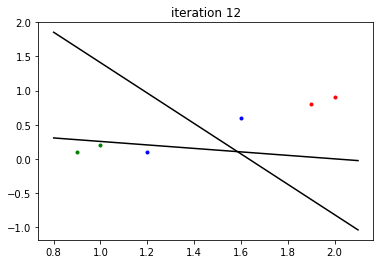

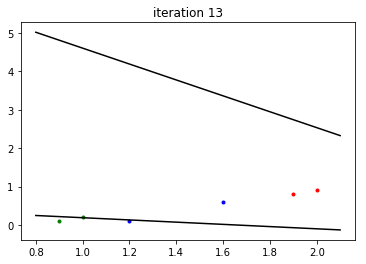

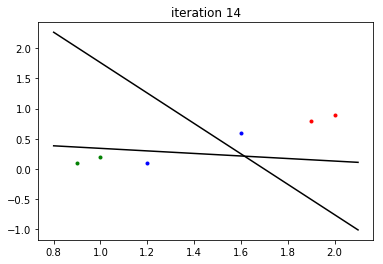

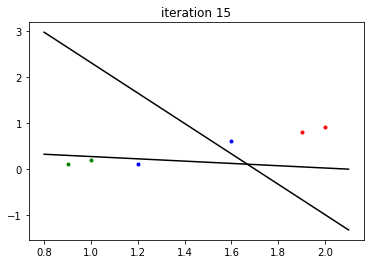

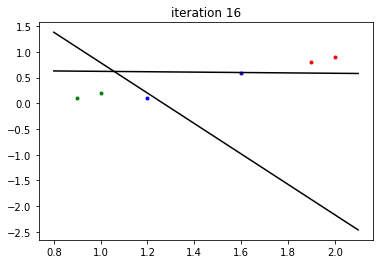

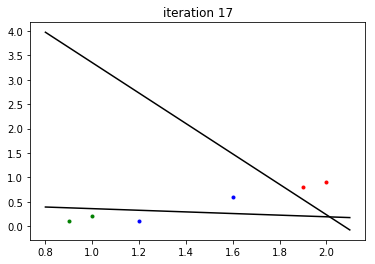

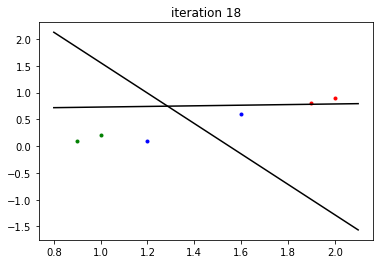

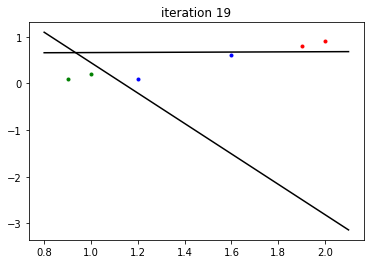

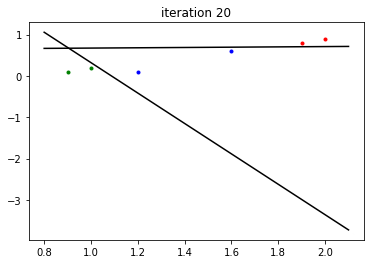

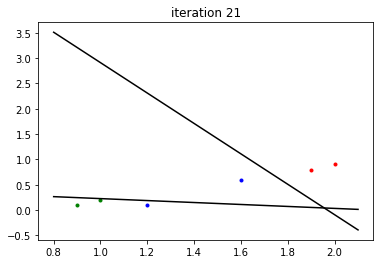

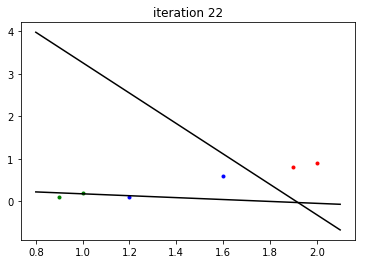

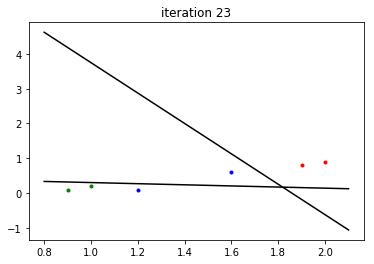

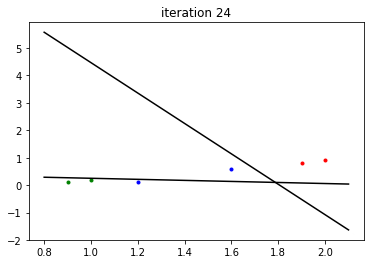

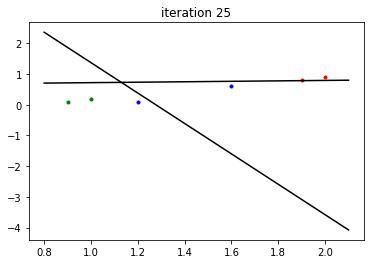

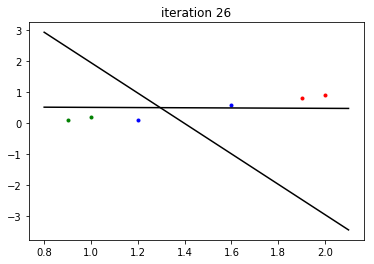

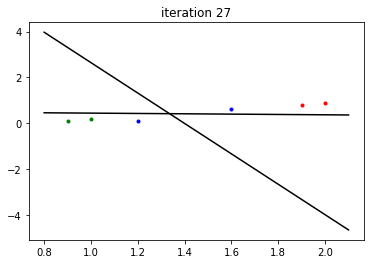

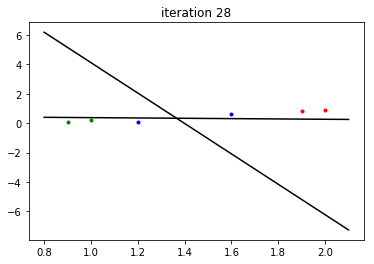

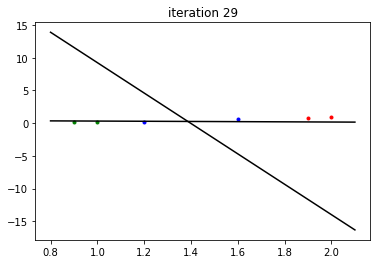

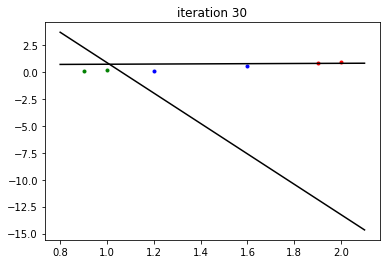

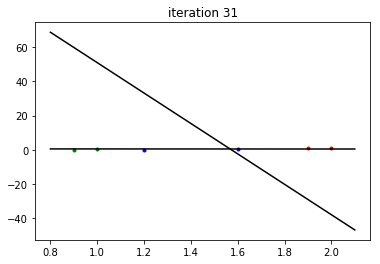

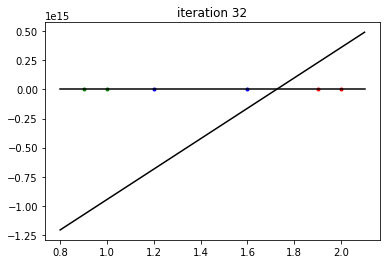

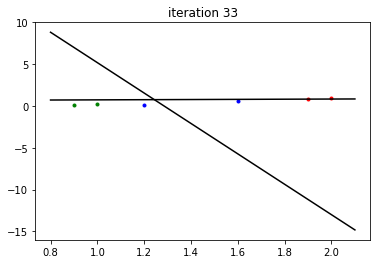

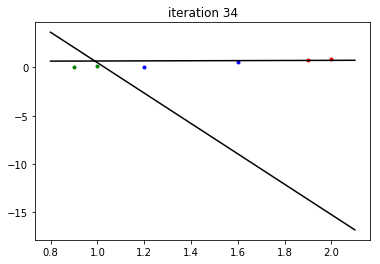

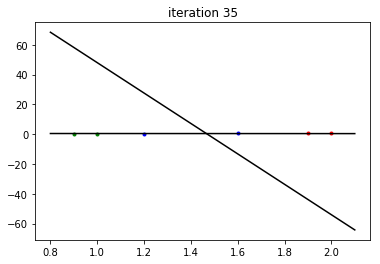

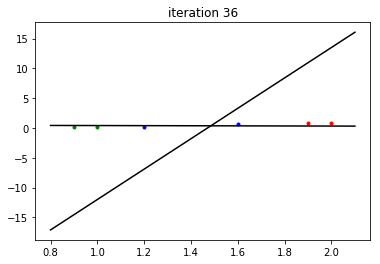

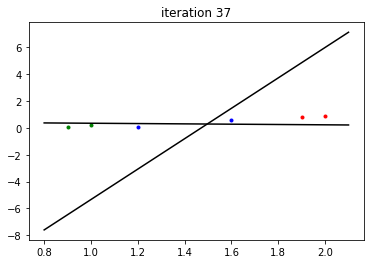

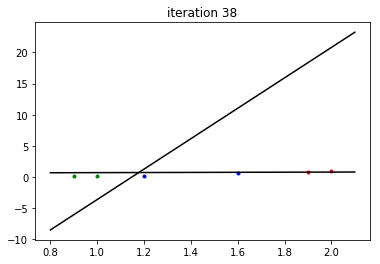

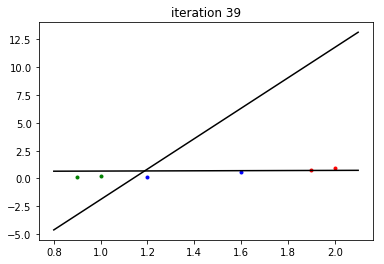

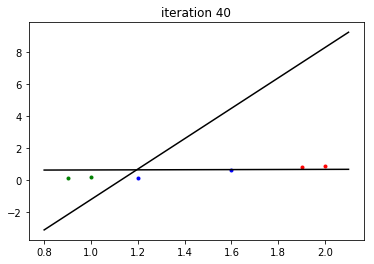

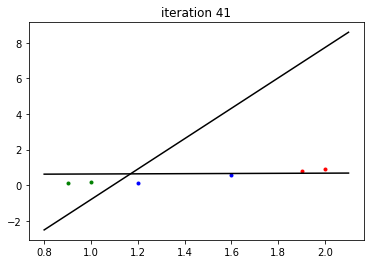

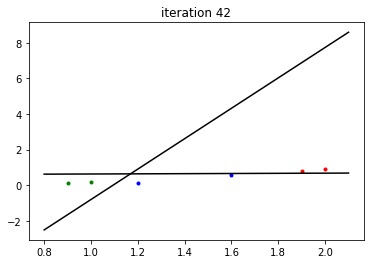

w =  [[-3.05 -1.13]
 [-1.77 -1.28]
 [-1.85  0.43]]
w0 =  [-0.3 -1.7 -2.7]
it =  42


In [12]:
# train perceptron
nn = Perceptron(3,itMax=300,ploter=True)  
nn.train(data)   

Now we can test some points to evaluate the accuracy of the classifier.

testData is of class  2


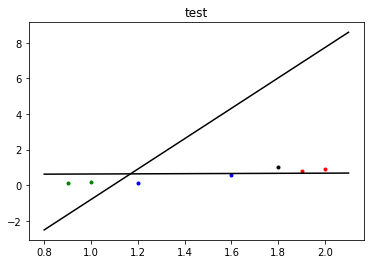

In [13]:
# test perceptron
testData = np.asarray([1.8, 1])
print("testData is of class ", nn.evaluate(testData))
nn.plot(data,'test',test=testData)

testData is of class  1


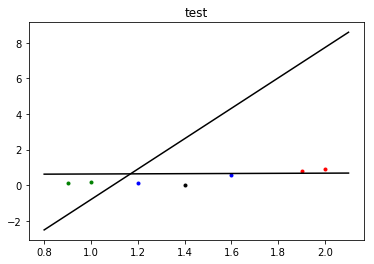

In [14]:
# test perceptron
testData = np.asarray([1.4, 0])
print("testData is of class ", nn.evaluate(testData))
nn.plot(data,'test',test=testData)

testData is of class  0


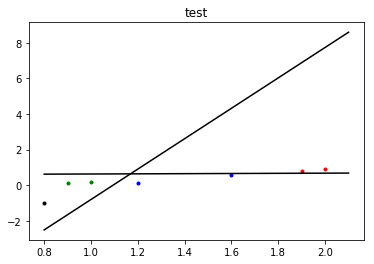

In [16]:
# test perceptron
testData = np.asarray([0.8, -1])
print("testData is of class ", nn.evaluate(testData))
nn.plot(data,'test',test=testData)

This is the Perceptron class:

In [11]:
import numpy as np 
import random
import matplotlib.pyplot as plt 

class Perceptron2d:
    # init preceptron: C = numero de clases
    def __init__(self,C,a = 0.1,b = 0.1,itMax = 100, ploter=False):
        # parameters
        self.a = a
        self.b = b
        self.itMax = itMax
        self.ploter = ploter
        # init weights
        self.C = C
        self.w = np.zeros((C,2))    
        self.w0 = np.zeros(C)
    # train perceptron
    def train(self,data):
        it = 0
        # extract labels
        lab = data[:,2]
        x = data[:,0:2]
        # random acces to data
        arr = list(range(len(x)))
        random.shuffle(arr)  
        while True:
            it += 1
            error2 = False
            for n in arr:
                i = int(lab[n])
                g = (np.dot(self.w[i],x[n]) + self.w0[i])  
                error = False              
                for j in range(self.C): # clases son: 0, 1, 2, ...
                    if j != i:
                        gj = np.dot(self.w[j],x[n]) + self.w0[j] + self.b
                        if gj > g:
                            self.w[j] = self.w[j] - self.a*x[n]
                            self.w0[j] = self.w0[j] - self.a
                            error = True
                if error:
                    self.w[i] = self.w[i] + self.a*x[n]
                    self.w0[i] = self.w0[i] + self.a
                    error2 = True
            if self.ploter:
                self.plot(data,tit="iteration "+str(it))
            if error2 == False or it >= self.itMax:
                break;
            
        print("w = ",self.w)
        print("w0 = ",self.w0)
        print("it = ",it)
        if it == self.itMax:            
            print("Not converged")
    # evaluate
    def evaluate(self,test):
        gMax, cMax = -1e8, -1
        for i in range(self.C):
            g = (np.dot(self.w[i],test) + self.w0[i])
            if g > gMax:
                gMax = g
                cMax = i
        return cMax
    # plot 
    def plot(self,x,tit='',test=[]):
        color = ['.g','.b','.r','.y']
        for l in range(self.C):
            plt.plot(
                [j for i, j in enumerate(x[:,0]) if x[i][2] == l],
                [j for i, j in enumerate(x[:,1]) if x[i][2] == l],
                color[l]
            )        
        xp = np.arange(0.8,2.2,step=0.1)
        for i in range(self.C-1):
            # linea que separa clases i e i+1
            y = (xp*(self.w[i][0]-self.w[i+1][0]) + (self.w0[i]-self.w0[i+1]))/(self.w[i+1][1]-self.w[i][1])
            plt.plot(xp,y,'k')
        if len(test) > 0:
            plt.plot(test[0],test[1],'.k')
        plt.title(tit)
        plt.show()

## Propsed tasks

- Try with a train data set that cannot be divided with a plane, for example set point [0.9,0.1] to class 1. The algorithm will not converge without training errors (this is why we need a maxium number of iterations stop criteria), but the perceptron will be able to classify nevertheless.
- The optimal parameters of the perceptron (a, b) will depend on the data and must be adjusted (it will affect convergence).


## Author

Juan Sensio - juansensio03@gmail.com